In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot  as plt


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price/Housing.csv


# data cleaning and loading 

In [2]:
df = pd.read_csv('/kaggle/input/housing-price/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Check for unique values in categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    print(f"{col} unique values: {df[col].unique()}")



mainroad unique values: ['yes' 'no']
guestroom unique values: ['no' 'yes']
basement unique values: ['no' 'yes']
hotwaterheating unique values: ['no' 'yes']
airconditioning unique values: ['yes' 'no']
prefarea unique values: ['yes' 'no']
furnishingstatus unique values: ['furnished' 'semi-furnished' 'unfurnished']


In [6]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [8]:
df.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [9]:
df.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object

In [10]:
# datasheet is cleaned and ready to use

# Feature Selection: Identify relevant features that may contribute to the predictive model.

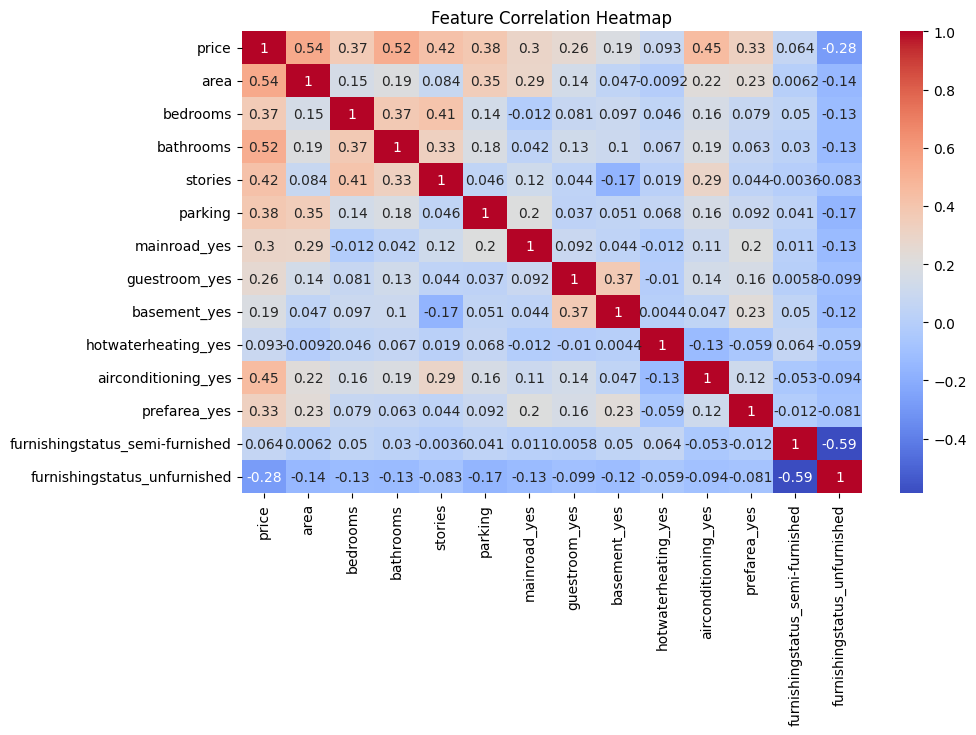

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Model Training: Implement linear regression using a machine learning library 

In [12]:

from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Intercept: 260032.35760741215


# Model Evaluation: Evaluate the model's performance on a separate test dataset using
# metrics such as Mean Squared Error or R-squared.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 1754318687330.6638
R-squared (R²): 0.6529242642153184


# Visualization: Create visualizations to illustrate the relationship between the predicted and
# actual values.


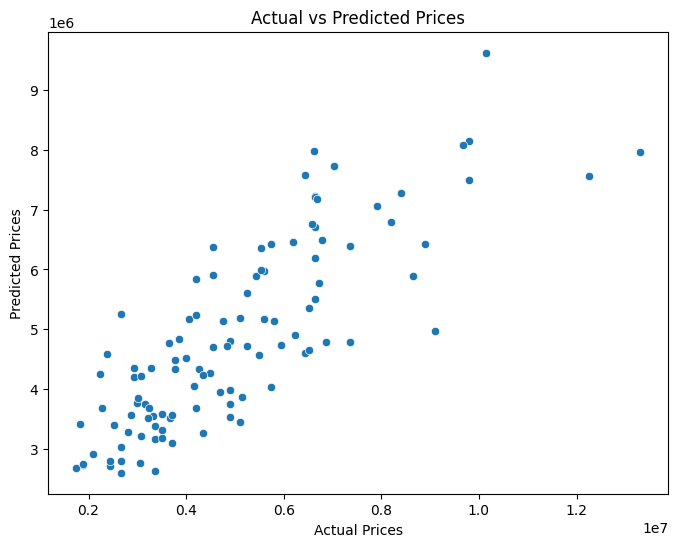

In [15]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


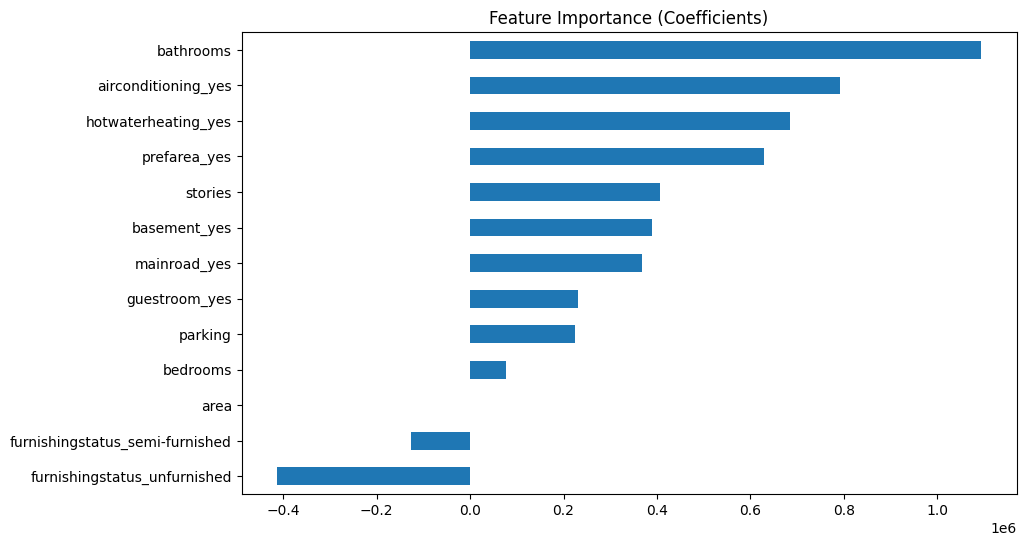

In [16]:
# Plot feature coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Coefficients)")
plt.show()
